## Perturb the peak in a two hidden units system and check convergance

In [1]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies

In [111]:
#%%capture capt1
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=200) # N steps.

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

#Copy the original weights to a matrix
W_original = np.copy(np.array(results['W']))

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

In [112]:
#%%capture capt2
#Supress the output of the cell and save it to capt2

#Perturb one of the peaks and run the system again for convergance

#Roll one of the arrays so that the peak gets shifted to the location of the other peak
weightsInitial    = np.copy(W_original[-1])
rollValue         = -(np.argmax(abs(weightsInitial[0]))-np.argmax(abs(weightsInitial[1])))
weightsInitial[0] = np.roll(weightsInitial[0],rollValue) 

#Initialize the RBM model with initial weights
RBM.weights = np.copy(weightsInitial)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous');

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

In [113]:
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

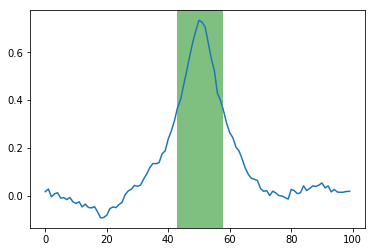

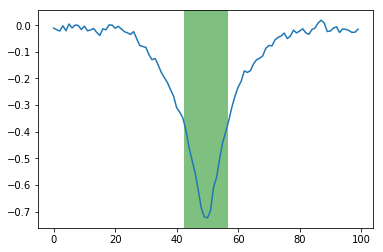

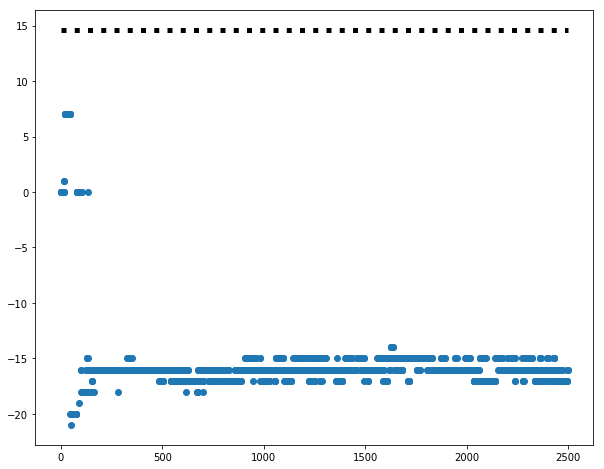

In [114]:
#plot the distance between the peaks as a function of time

import peakDistance
import peakWidth

inter_Peak_Distance = []
Weights  = np.array(results['W'])
posPeak0 = np.argmax(abs(Weights)[:,0,:],axis=1)
posPeak1 = np.argmax(abs(Weights)[:,1,:],axis=1)

for i in range(Weights.shape[0]):
    inter_Peak_Distance.append(peakDistance.peakDistance(posPeak0[i],posPeak1[i],N))

#Average Peak width of the two peaks from the last frame only:
pW = (peakWidth.peakWidth(weight=Weights[-1,0,:],plot=True) + peakWidth.peakWidth(weight=Weights[-1,1,:],plot=True))/2

inter_Peak_Distance = np.array(inter_Peak_Distance)
plt.figure(figsize=(10,8))
plt.scatter(range(len(inter_Peak_Distance)),inter_Peak_Distance)
plt.hlines(pW,0,len(inter_Peak_Distance),linewidth=5)

In [116]:
#%%capture capt2
#Supress the output of the cell and save it to capt2

#Perturb one of the peaks and run the system again for convergance

#Roll one of the arrays so that the peak gets shifted to the location of the other peak
weightsInitial2    = np.copy(W_original[-1])
rollValue2         = -(np.argmax(abs(weightsInitial[0]))-np.argmax(abs(weightsInitial[1])))
weightsInitial2[0] = np.roll(weightsInitial[0],rollValue+4) 

#Initialize the RBM model with initial weights
RBM.weights = np.copy(weightsInitial2)
results2 = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous');

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

In [117]:
inlineMovies.generatePlot(Ydata=np.array(results2['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

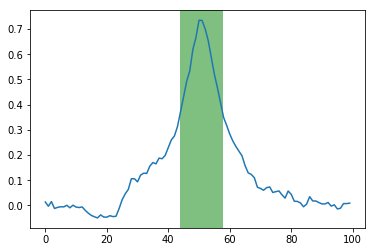

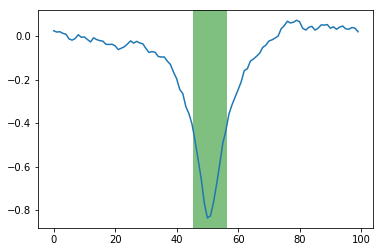

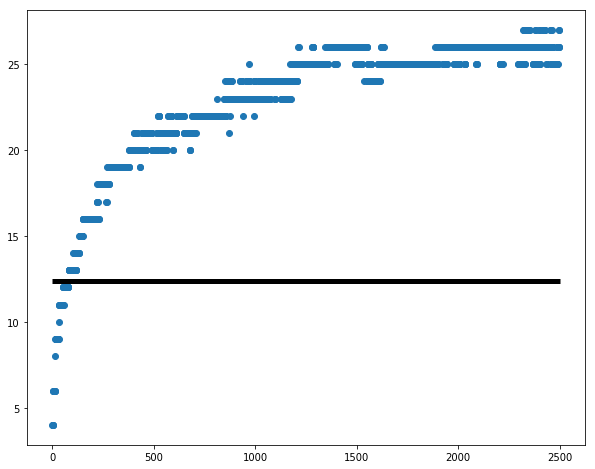

In [118]:
#plot the distance between the peaks as a function of time

import peakDistance
import peakWidth

inter_Peak_Distance2 = []
Weights2  = np.array(results2['W'])
posPeak02 = np.argmax(abs(Weights2)[:,0,:],axis=1)
posPeak12 = np.argmax(abs(Weights2)[:,1,:],axis=1)

for i in range(Weights2.shape[0]):
    inter_Peak_Distance2.append(peakDistance.peakDistance(posPeak02[i],posPeak12[i],N))

#Average Peak width of the two peaks from the last frame only:
pW2 = (peakWidth.peakWidth(weight=Weights2[-1,0,:],plot=True) + peakWidth.peakWidth(weight=Weights2[-1,1,:],plot=True))/2

inter_Peak_Distance2 = np.array(inter_Peak_Distance2)
plt.figure(figsize=(10,8))
plt.scatter(range(len(inter_Peak_Distance2)),inter_Peak_Distance2)
plt.hlines(pW2,0,len(inter_Peak_Distance2),linewidth=5)

In [125]:
#%%capture capt1
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=200) # N steps.

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

#Copy the original weights to a matrix
W_original3 = np.copy(np.array(results['W']))

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

In [126]:
#%%capture capt2
#Supress the output of the cell and save it to capt2

#Perturb one of the peaks and run the system again for convergance

#Roll one of the arrays so that the peak gets shifted to the location of the other peak
weightsInitial3    = np.copy(W_original3[-1])
rollValue3         = -(np.argmax(abs(weightsInitial3[0]))-np.argmax(abs(weightsInitial3[1])))
weightsInitial3[0] = np.roll(weightsInitial3[0],rollValue3)

#Initialize the RBM model with initial weights
RBM.weights = np.copy(weightsInitial3)
results3 = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous');

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

In [ ]:
inlineMovies.generatePlot(Ydata=np.array(results3['W'][0:400]),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

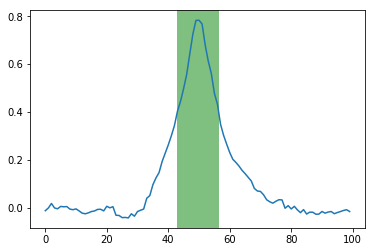

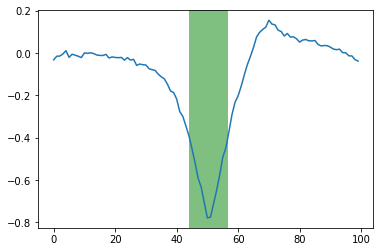

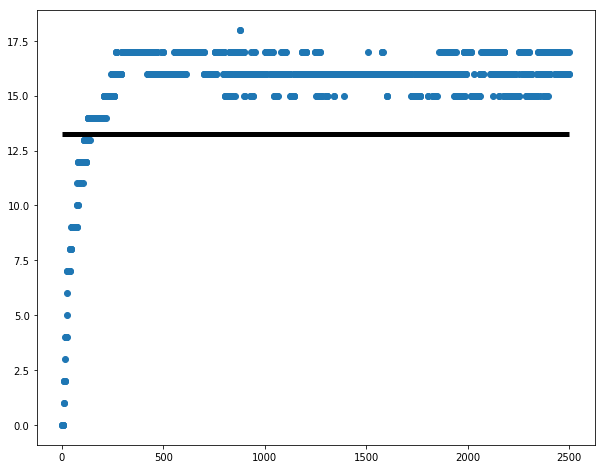

In [128]:
#plot the distance between the peaks as a function of time

import peakDistance
import peakWidth

inter_Peak_Distance3 = []
Weights3  = np.array(results3['W'])
posPeak03 = np.argmax(abs(Weights3)[:,0,:],axis=1)
posPeak13 = np.argmax(abs(Weights3)[:,1,:],axis=1)

for i in range(Weights3.shape[0]):
    inter_Peak_Distance3.append(peakDistance.peakDistance(posPeak03[i],posPeak13[i],N))

#Average Peak width of the two peaks from the last frame only:
pW3 = (peakWidth.peakWidth(weight=Weights3[-1,0,:],plot=True) + peakWidth.peakWidth(weight=Weights3[-1,1,:],plot=True))/2

inter_Peak_Distance3 = np.array(inter_Peak_Distance3)
plt.figure(figsize=(10,8))
plt.scatter(range(len(inter_Peak_Distance3)),inter_Peak_Distance3)
plt.hlines(pW3,0,len(inter_Peak_Distance3),linewidth=5)